In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
# code directly copied from covid19api to query covid19 data in singapore for all type of cases
import requests

url = "https://api.covid19api.com/total/country/singapore"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

df=pd.DataFrame(response.json())

In [3]:
df=df[["Country","Confirmed","Deaths","Recovered","Active","Date"]]

In [4]:
df["Date"]=pd.to_datetime(df["Date"])

In [5]:
df

,Country,Confirmed,Deaths,Recovered,Active,Date
0,Singapore,0,0,0,0,2020-01-22 00:00:00+00:00
1,Singapore,1,0,0,1,2020-01-23 00:00:00+00:00
2,Singapore,3,0,0,3,2020-01-24 00:00:00+00:00
3,Singapore,3,0,0,3,2020-01-25 00:00:00+00:00
4,Singapore,4,0,0,4,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...
649,Singapore,200844,421,0,200423,2021-11-01 00:00:00+00:00
650,Singapore,204340,430,0,203910,2021-11-02 00:00:00+00:00
651,Singapore,207975,442,0,207533,2021-11-03 00:00:00+00:00
652,Singapore,210978,459,0,210519,2021-11-04 00:00:00+00:00


In [6]:
#graph would be more meaningful to show daily confirmed, daily death, daily recovered

In [7]:
df["previous_confirmed"]=df["Confirmed"].shift(1, fill_value=0)
df["previous_deaths"]=df["Deaths"].shift(1, fill_value=0)
df["previous_recovered"]=df["Recovered"].shift(1, fill_value=0)

In [8]:
df["daily_confirmed"]=df["Confirmed"] - df["previous_confirmed"]
df["daily_deaths"]=df["Deaths"] - df["previous_deaths"]
df["daily_recovered"]=df["Recovered"] - df["previous_recovered"]

In [9]:
df

,Country,Confirmed,Deaths,Recovered,Active,Date,previous_confirmed,previous_deaths,previous_recovered,daily_confirmed,daily_deaths,daily_recovered
0,Singapore,0,0,0,0,2020-01-22 00:00:00+00:00,0,0,0,0,0,0
1,Singapore,1,0,0,1,2020-01-23 00:00:00+00:00,0,0,0,1,0,0
2,Singapore,3,0,0,3,2020-01-24 00:00:00+00:00,1,0,0,2,0,0
3,Singapore,3,0,0,3,2020-01-25 00:00:00+00:00,3,0,0,0,0,0
4,Singapore,4,0,0,4,2020-01-26 00:00:00+00:00,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
649,Singapore,200844,421,0,200423,2021-11-01 00:00:00+00:00,198374,407,0,2470,14,0
650,Singapore,204340,430,0,203910,2021-11-02 00:00:00+00:00,200844,421,0,3496,9,0
651,Singapore,207975,442,0,207533,2021-11-03 00:00:00+00:00,204340,430,0,3635,12,0
652,Singapore,210978,459,0,210519,2021-11-04 00:00:00+00:00,207975,442,0,3003,17,0


In [10]:
#df with daily confirmed, daily death, daily recovered

df_daily=df[["Country","daily_confirmed","daily_deaths","daily_recovered","Active","Date"]]

In [11]:
df_daily

,Country,daily_confirmed,daily_deaths,daily_recovered,Active,Date
0,Singapore,0,0,0,0,2020-01-22 00:00:00+00:00
1,Singapore,1,0,0,1,2020-01-23 00:00:00+00:00
2,Singapore,2,0,0,3,2020-01-24 00:00:00+00:00
3,Singapore,0,0,0,3,2020-01-25 00:00:00+00:00
4,Singapore,1,0,0,4,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...
649,Singapore,2470,14,0,200423,2021-11-01 00:00:00+00:00
650,Singapore,3496,9,0,203910,2021-11-02 00:00:00+00:00
651,Singapore,3635,12,0,207533,2021-11-03 00:00:00+00:00
652,Singapore,3003,17,0,210519,2021-11-04 00:00:00+00:00


In [12]:
#until 2021-08-04; where data all correct
df_daily_cut = df_daily[df_daily["Date"]< "2021-08-05"]

In [13]:
df_daily_cut

,Country,daily_confirmed,daily_deaths,daily_recovered,Active,Date
0,Singapore,0,0,0,0,2020-01-22 00:00:00+00:00
1,Singapore,1,0,0,1,2020-01-23 00:00:00+00:00
2,Singapore,2,0,0,3,2020-01-24 00:00:00+00:00
3,Singapore,0,0,0,3,2020-01-25 00:00:00+00:00
4,Singapore,1,0,0,4,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...
556,Singapore,120,0,130,2081,2021-07-31 00:00:00+00:00
557,Singapore,121,0,94,2108,2021-08-01 00:00:00+00:00
558,Singapore,111,1,76,2142,2021-08-02 00:00:00+00:00
559,Singapore,102,0,219,2025,2021-08-03 00:00:00+00:00


In [14]:
#set default size of graph bigger
plt.rcParams['figure.figsize'] = [12, 5]

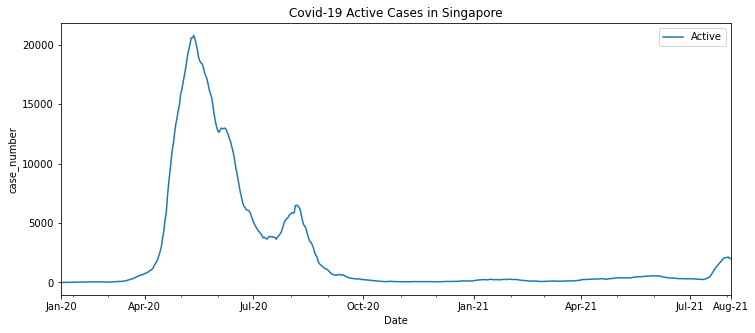

In [73]:
#plot line graph for active cases across time
df_daily_cut.plot(x="Date",y="Active",kind="line")

plt.xlabel("Date")
plt.ylabel("case_number")
plt.title("Covid-19 Active Cases in Singapore")

date_form = DateFormatter("%b-%y")
ax=plt.gca()
ax.xaxis.set_major_formatter(date_form)

plt.show()

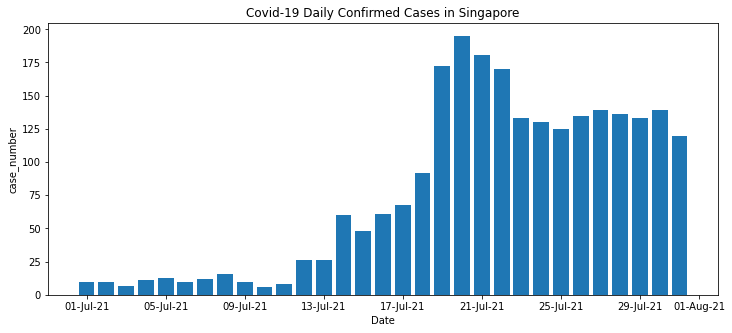

In [72]:
#plot bar chart for daily_confirmed cases in a given date range

start_date="2021-07-01" #set the start date here
end_date="2021-07-31" #set the end date here; only till 2021-08-04

a=df_daily_cut[df_daily_cut["Date"].dt.strftime("%Y-%m-%d")==start_date].index.tolist()[0]
b=df_daily_cut[df_daily_cut["Date"].dt.strftime("%Y-%m-%d")==end_date].index.tolist()[0]

df_daily_confirmed_date = df_daily_cut.iloc[a:b+1,:]
plt.bar(df_daily_confirmed_date["Date"],df_daily_confirmed_date["daily_confirmed"])

date_form = DateFormatter("%d-%b-%y")
ax=plt.gca()
ax.xaxis.set_major_formatter(date_form)

plt.xlabel("Date")
plt.ylabel("case_number")
plt.title("Covid-19 Daily Confirmed Cases in Singapore")

plt.show()

In [ ]:
#until latest date for daily_confirmed, daily_death
df_daily_full = df_daily[["Country","daily_confirmed","daily_deaths","Date"]]

In [ ]:
df_daily_full